# Evaluation of multilog measurement

Growth experiment: Sn in aluminum crucible, September 8th, 2022

## Process information

- 11:29:11 - heating up
- 13:01:45 - seeding
- 13:08:15 - growing
- 21:01:43 - cool down
- 21:18:15 - end

## Read data and generate overview plots

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("./DAQ-6510.csv", comment="#")

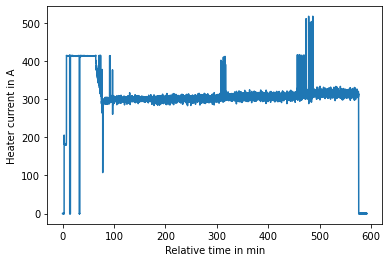

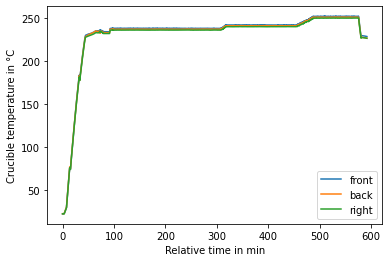

In [3]:
fig, ax = plt.subplots()
ax.plot(df["time_rel"] / 60, df["rogowski_300A"])
ax.set_xlabel("Relative time in min")
ax.set_ylabel("Heater current in A")

fig2, ax2 = plt.subplots()
ax2.plot(df["time_rel"] / 60, df["TE_2_K crucible frontside"], label="front")
ax2.plot(df["time_rel"] / 60, df["Pt-100_1 crucible backside"], label="back")
ax2.plot(df["time_rel"] / 60, df["Pt-100_2 crucible rightside"], label="right")
ax2.set_xlabel("Relative time in min")
ax2.set_ylabel("Crucible temperature in °C")
ax2.legend()

## Evaluate measurement data during growth

In [4]:
t_growth_start = 6129  # from protocol file
t_growth_end = 34533  # from protocol file

# filter data
df_growth = df.loc[(t_growth_start < df["time_rel"]) & (df["time_rel"] < t_growth_end)]

# compute average values
print(f"Mean current: {df_growth['rogowski_300A'].mean():.2f} A")
print(f"Mean temperature front: {df_growth['TE_2_K crucible frontside'].mean():.2f} °C")
print(f"Mean temperature back: {df_growth['Pt-100_1 crucible backside'].mean():.2f} °C")
print(
    f"Mean temperature right: {df_growth['Pt-100_2 crucible rightside'].mean():.2f} °C"
)

Mean current: 306.84 A
Mean temperature front: 242.75 °C
Mean temperature back: 241.81 °C
Mean temperature right: 240.71 °C


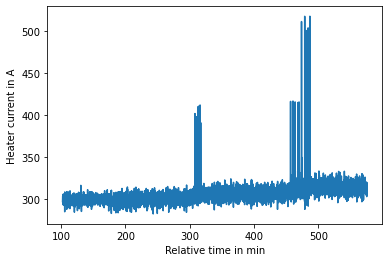

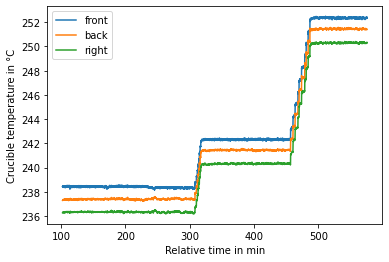

In [5]:
fig, ax = plt.subplots()
ax.plot(df_growth["time_rel"] / 60, df_growth["rogowski_300A"])
ax.set_xlabel("Relative time in min")
ax.set_ylabel("Heater current in A")

fig2, ax2 = plt.subplots()
ax2.plot(
    df_growth["time_rel"] / 60, df_growth["TE_2_K crucible frontside"], label="front"
)
ax2.plot(
    df_growth["time_rel"] / 60, df_growth["Pt-100_1 crucible backside"], label="back"
)
ax2.plot(
    df_growth["time_rel"] / 60, df_growth["Pt-100_2 crucible rightside"], label="right"
)
ax2.set_xlabel("Relative time in min")
ax2.set_ylabel("Crucible temperature in °C")
ax2.legend()

## Next steps

- Add data from other measurement devices
- Apply calibration curve to temperature sensors
- Restructure: input field at top to select sensors, time window / tag, ...